# <span style="color:#37464f"><center>**Yannick NOUDJOUKOUANG**</center></span>
### **<center>JEDHA (FULLSTACK - 2021)</center>**
# **<center>DEEP LEARNING</center>**
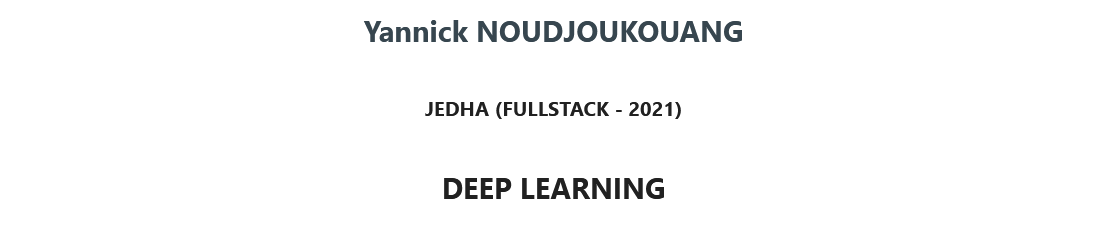

---


## <span>**PLAN**</span>

1. Introduction
2. Data collection & EDA
3. NLP Preprocessing & cloud of words
4. Machine Learning : Deep learning
5. Conclusions

---


### **1. Introduction**
---

**Good to know** : Natural Language Processing (NLP) is a sub branch of Deep Learning that deal with text and language. The main uses are to observe the frequency of the keywords and their relative importance. The aim is to help the machine understand the meaning or meanings that already exist within the language used by humans.

<p align="center"><center>
  <img width="600" height="600" src="https://www.meilleure-innovation.com/wp-content/uploads/2021/05/logo-twitter-histoire.jpg">
</center>
    </p>
    
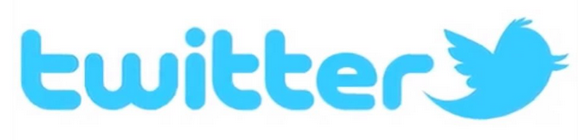

# Twitter : NLP with Disaster Tweets. Real or Not?

## Company's Description 📇

Twitter is a Social Network Company created by Jack Dorsey, Noah Glass, Biz Stone and Evan Williams in 2006. The headquarter is located in San Francisco.<br>
Its core business is related to the exchange of short text message with maximum 280 characters. <br>
With over \$3.8 billion revenue a year, Twitter operates worldwide. Since 2013, it's one of the most visited websites.

### **GOAL :**

The objective of this project is to determine if a Tweet is trully related to a natural disaster or not.<br>
We will be using a set of data from Twitter to perform our analysis and NLP processing.


### **2. Data collection & EDA**
---

## A) IMPORT LIBRARIES

### INSTALLATION & SETUPS

In [1]:
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [2]:
# Installation Plotly
!pip install plotly -q

In [3]:
!pip install wordcloud -q

In [4]:
# Installation TensorFlow
!pip install tensorflow -q

In [5]:
!pip install -U spacy -q
!python -m spacy download en_core_web_sm -q

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you'll have typing-extensions 3.10.0.2 which is incompatible.
2021-09-29 00:12:30.042828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-29 00:12:30.042926: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import pathlib 
import os
import seaborn as sns

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.recurrent import LSTM

import spacy
from spacy.lang.en.examples import sentences
from spacy.lang.en.stop_words import STOP_WORDS

import re 
import en_core_web_sm

#Create Wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [7]:
nlp = spacy.load("en_core_web_sm")

## B) EXPLORATORY DATA ANALYSIS

### 1. Dataset overview

In [8]:
data = pd.read_csv('train.csv', encoding='utf8')
data = data.sample(len(data))

data.sample(5)

,id,keyword,location,text,target
3343,4787,evacuated,"Harpurhey, Manchester, UK",Trafford Centre film fans angry after Odeon ci...,0
4393,6245,hijacking,"brisbane, australia",#hot Funtenna: hijacking computers to send da...,0
3740,5316,fire,NaN,Save the Date! Saturday August 15 2015 is the ...,0
921,1334,blown%20up,Oklahoma,@ManUtd @EmilymcfcHeslop \n\nWow just wow! \n\...,0
2601,3735,destroyed,"Boise, Idaho",70 years after #ABomb destroyd #HiroshimaÛÓ#B...,1


In [9]:
print('The dataset has the following shape :', data.shape)

The dataset has the following shape : (7613, 5)


In [10]:
print('Rough analysis')
print(data.info())
print(' ')
print('------------------')
print(' ')
print(data.nunique())
print(' ')
print('------------------')
print(' ')
print('* The dataset has initially {} rows and {} columns.'.format(data.shape[0],data.shape[1]))

Rough analysis
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1236 to 2302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.9+ KB
None
 
------------------
 
id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64
 
------------------
 
* The dataset has initially 7613 rows and 5 columns.


In [11]:
#Show the frequency of column "keyword"
regular_kw = data.keyword.value_counts()

### Missing values

In [12]:
print(data.isnull().sum())
print(' ')
print('------------------')
print(' ')
print('We can see that except the column "Store" all the oother columns have missing values')
print(' ')
print('------------------')
print(' ')
print("Percentage of missing values:(%)")
display(100*data.isnull().sum()/data.shape[0])
print(' ')

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
 
------------------
 
We can see that except the column "Store" all the oother columns have missing values
 
------------------
 
Percentage of missing values:(%)


id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

### 2. Top Keywords

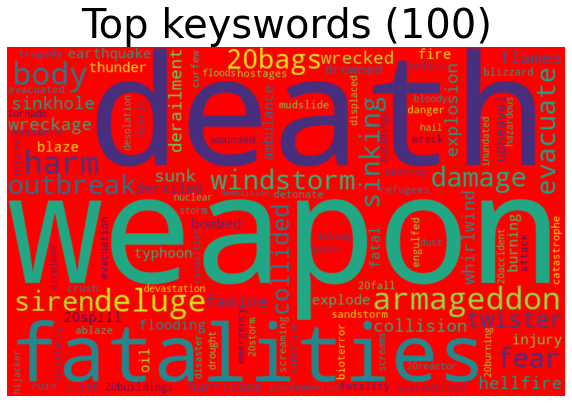

In [13]:
#Generate the TOP 100 relevant words
top_kw = regular_kw.head(100)
top_kw = top_kw.index

#Wordcloud settings
mask = np.array(Image.open("comment_wc.png"))
words = ' '.join(''.join(text) for text in top_kw)                            
wcd = WordCloud(background_color="red",
                        width=800, 
                            height=500, 
                                stopwords=STOP_WORDS, 
                                    #mask=mask
                                       ).generate(words)

#Wordcloud graph
plt.figure(figsize=(10, 7)) 
plt.imshow(wcd, interpolation="bilinear")
plt.title("Top keyswords (100)", fontsize=40)
plt.axis('off')
plt.show()

We can clearly see that the top words of this dataset are mainly related to accident, disaster or death.

### 3. Visualizations

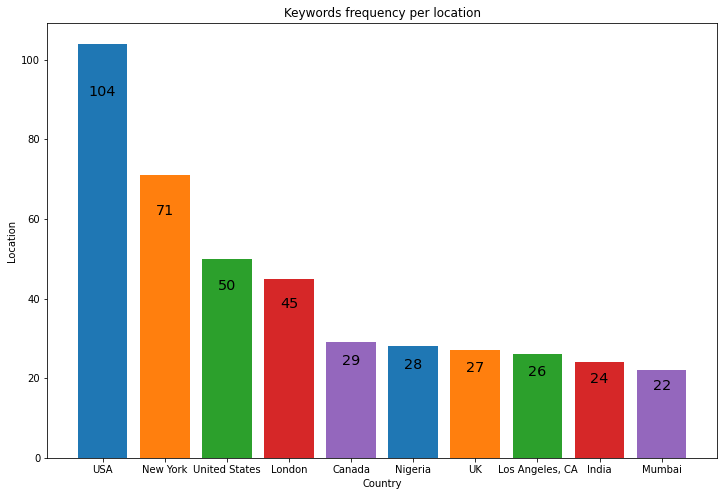

In [14]:
#Show the frequency of column "location"
top_cities = data.location.value_counts().head(10)
top_cities.index
top_cities.values

#Show the bar chart
plt.figure(figsize = (12, 8))
for i in range(len(top_cities.index)):
    plt.text(top_cities.index[i],top_cities[i]*0.9, np.round(top_cities[i],2), ha = "center", va = "top", size='x-large')

plt.bar(top_cities.index, top_cities.values, color=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple']
       )
plt.title("Keywords frequency per location")
plt.xlabel("Country")
plt.ylabel("Location")
plt.show()


In [15]:
#Set the TOP 10 countries in term of events
data['Top_country'] = data['location'].apply(lambda x: 'USA' if x == 'New York' 
                                                    else 'USA' if x == 'United States' 
                                                        else 'UK' if x == 'London'
                                                            else 'USA' if x == 'Los Angeles, CA'
                                                             else 'India' if x == 'Mumbai'
                                             else 'USA' if x == 'Washington, DC'
                                                 else 'USA' if x == 'Chicago, IL'
                                                     else 'USA' if x == 'New York, NY'
                                                         else 'USA' if x == 'California, USA'
                                                             else 'USA' if x == 'San Francisco'
                                             else 'USA' if x == 'Florida'
                                                 else 'UK' if x == 'United Kingdom'
                                                     else 'USA' if x == 'California'
                                                          else 'USA' if x == 'Los Angeles'
                                                              else 'USA' if x == 'Washington, D.C.'        
                                                                else  x 

                                                   )

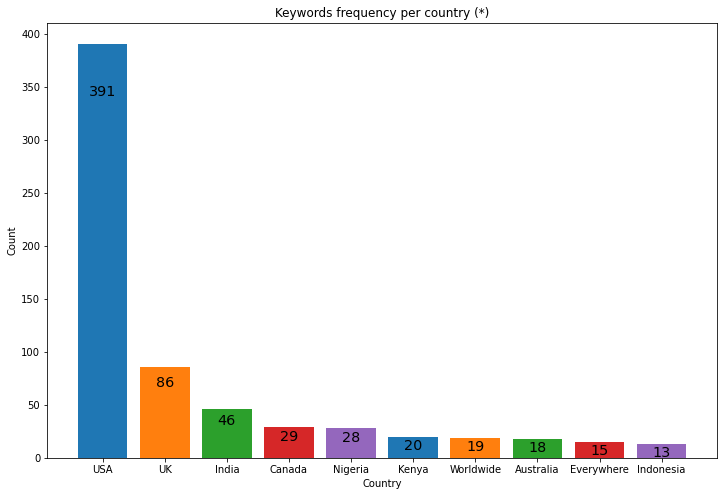

In [16]:
#Show the frequency of column "location"
top_countries = data.Top_country.value_counts().head(10)
top_countries.index
top_countries.values

#Show the bar chart
plt.figure(figsize = (12, 8))
for i in range(len(top_countries.index)):
    plt.text(top_countries.index[i],top_countries[i]*0.9, np.round(top_countries[i],2), ha = "center", va = "top", size='x-large')

plt.bar(top_countries.index, top_countries.values, color=['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple']
       )
plt.title("Keywords frequency per country (*)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


We can see that the USA has the highest number of Tweet related. <br>
We can explain this by the fact that Twitter is an American application which is very popular in US.<br>
Twitter is much more used in pure english tongue countries.

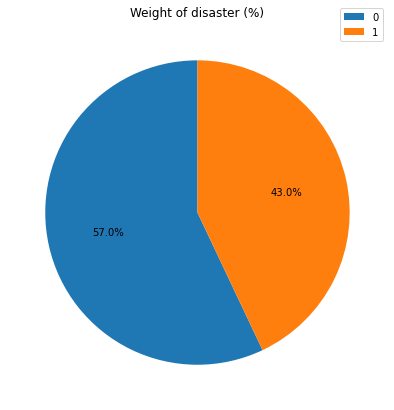

 
------------------------------------------------------------------------
 


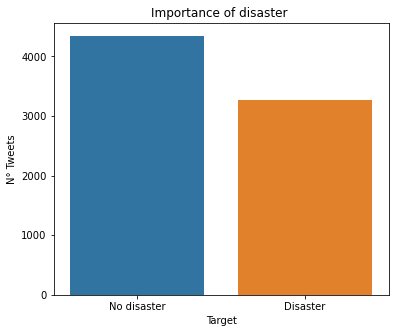

In [17]:
#Disaster or non-disaster label
weight_disaster = data.groupby('target')['text'].count()

# Declaring indexes and values
nbr_disaster_values = weight_disaster.values
nbr_disaster_index = weight_disaster.index


 
plt.figure(figsize = (9, 7))

plt.pie(nbr_disaster_values, 
        autopct = '%1.1f%%',
        #labels = nbr_converted_index,
        startangle= 90,
        
           )

plt.legend(nbr_disaster_index, bbox_to_anchor=(1.0, 1.05))
plt.title("Weight of disaster (%)")
plt.show()

print(' ')
print('------------------------------------------------------------------------')
print(' ')

plt.figure(figsize = (6, 5))

#Repartition of the target
ax = sns.barplot(x = data.target.value_counts().index, y = data.target.value_counts())
ax.set (ylabel="N° Tweets", 
        title ="Importance of disaster ", 
        xlabel = "Target",
        xticklabels = ['No disaster', 'Disaster'],
       )

plt.show()


In [18]:
data.drop(['id', 'keyword','location','Top_country'], axis=1, inplace = True)


### **3. NLP Preprocessing & cloud of words**
---

## A) CLEANING

In [19]:
#Delete emojis
emoji_pattern = u"\U0001F600-\U0001F64F]+"
data["text_clean"] = data["text"].apply(lambda x:re.sub(emoji_pattern, '', x))

#Remove tweet account 
data["text_clean"] = data["text_clean"].apply(lambda x: re.sub(r"@\w+", "", x))

#Remove Emails
data["text_clean"] = data["text_clean"].apply(lambda x: re.sub(r'@[^\s]+','', x))

#General cleaning
#data["text_clean"] = data["text_clean"].apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x))

#Remove Emails
data["text_clean"] = data["text_clean"].apply(lambda x: re.sub(r'@[^\s]+','', x))

#Remove les url
data["text_clean"] = data["text_clean"].apply(lambda x: re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x,))

# Delete special characters
data["text_clean"] = data["text_clean"].apply(lambda x: re.sub(r'\W', ' ', x))

# Remove double space
data["text_clean"] = data["text_clean"].apply(lambda x:re.sub(r'\s+', ' ', x))

# Delete /n ou autre
data["text_clean"] = data["text_clean"].apply(lambda x:re.sub("\s+"," ",x).lower().strip())

# Remove figures 
#data["text_clean"] = data["text_clean"].apply(lambda x:re.sub(r"(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b","",x ))

# Clean  upper letters
data['text_clean'] = data['text_clean'].fillna('').apply(lambda x: x.lower())

#Remove all alfanumeric special character
data['text_clean']= data["text_clean"].apply(lambda x:[element for element in x if element.isalnum() or element==" "])

data['text_clean']=data["text_clean"].apply(lambda x:"".join([element for element in x if element.isalnum() or element==" "]))

#Dele atypique elements
data["text_clean"] = data["text_clean"].str.replace('û', '').str.replace(' s ','').str.replace(' amp ','')

#Delete you
data["text_clean"] = data["text_clean"].str.replace(' U ',' you ').str.replace(' u ',' you ')

#Delete 
data["text_clean"] = data["text_clean"].str.replace(' rt ','')\
                        .str.replace(' a ','')\
                            .str.replace(' don ','')\
                                .str.replace(' t ','')\
                                    .str.replace(' n ','')\
                                        .str.replace(' d ','')\
                                            .str.replace(' ve ','')


#adding our own stopwords
STOP_WORDS.update(['new','news','m','like','don t',' rt ',' a ',' t ',' don ','think','know','day'])

#Delete STOPWORDS
data["text_clean"] = data["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

## B) LEMMATIZATION & TOKENIZATION

In [20]:
#lemmatisation 
data['text_clean']=data["text_clean"].apply(lambda x:[token.lemma_ for token in nlp(x) if token.lemma_ not in STOP_WORDS and token.text not in STOP_WORDS])

# Création d'une instance de tokenize
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data["text_clean"])

# Tokenization + Encoding
data["encoded"] = tokenizer.texts_to_sequences(data["text_clean"])

#Count words in text_clean
data["len_text"] = data['text_clean'].apply(lambda x: len(x))
data = data[data["len_text"]!=0]

display(data.head())



,text,target,text_clean,encoded,len_text
1236,Buildings are on fire and they have time for a...,1,"[build, fire, time, forbusiness, meeting, thes...","[124, 1, 12, 5397, 1512, 5398]",6
2994,NASA MODIS image: Dust storm over Morocco and ...,1,"[nasa, modis, image, dust, storm, morocco, str...","[2297, 5399, 543, 483, 29, 5400, 5401, 5402, 5...",9
6524,@DDNewsLive @NitishKumar and @ArvindKejriwal ...,0,"[cansurvive, refer, mr, modi, big, zero]","[2783, 1963, 1263, 5404, 93, 2784]",6
973,New Women Handbag Faux Leather Ladies Shoulder...,0,"[woman, handbag, faux, leather, lady, shoulder...","[68, 484, 949, 596, 331, 332, 736, 125, 13, 27...",12
4122,IG: http://t.co/2WBiVKzJIP 'It's hailing again...,1,"[ig, ithaile, abstorm, yyc, hail, hailstorm, h...","[2298, 5405, 1264, 1169, 232, 657, 5406, 5407,...",12


## C) PADDING

In [21]:
# pad sequences
padded_ecoded_text = tf.keras.preprocessing.sequence.pad_sequences(data["encoded"], padding="post")

# create the tensorflow dataset
all_encoded_data = tf.data.Dataset.from_tensor_slices((padded_ecoded_text, data["target"].values))

# Train Test Split
TAKE_SIZE = int(0.8*len(data))

train_data = all_encoded_data.take(TAKE_SIZE).shuffle(8000)
train_data = train_data.batch(64)

test_data = all_encoded_data.skip(TAKE_SIZE)
test_data = test_data.batch(64)

In [22]:
data.sample(5)

,text,target,text_clean,encoded,len_text
1997,@Drothvader @CM_Nevalistis you can keep this p...,1,"[arachy, 2, piece, deal, 4000, weapon, damage,...","[13726, 2, 1243, 403, 1366, 58, 90, 13727]",8
7417,@AsterPuppet wounded and carried her back to w...,0,"[wound, carry, brother, sister, enter, air, sh...","[74, 712, 858, 1118, 1196, 238, 287, 5781]",8
2869,#DroughtMonitor: Moderate or worse #drought ? ...,1,"[droughtmonitor, moderate, bad, drought, 27, c...","[6128, 3865, 83, 327, 2069, 6129, 681, 240, 16...",10
4060,#HeartDisease U.S. Forest Service says spendin...,1,"[heartdisease, uforest, service, spend, half, ...","[5766, 2020, 79, 798, 533, 1303, 1]",7
4145,'But right now you're only annoyed by them. If...,0,"[right, annoy, actually, hang, yousee, mean, h...","[81, 4759, 564, 2236, 10984, 321, 280]",7


## D) CLOUD OF WORDS

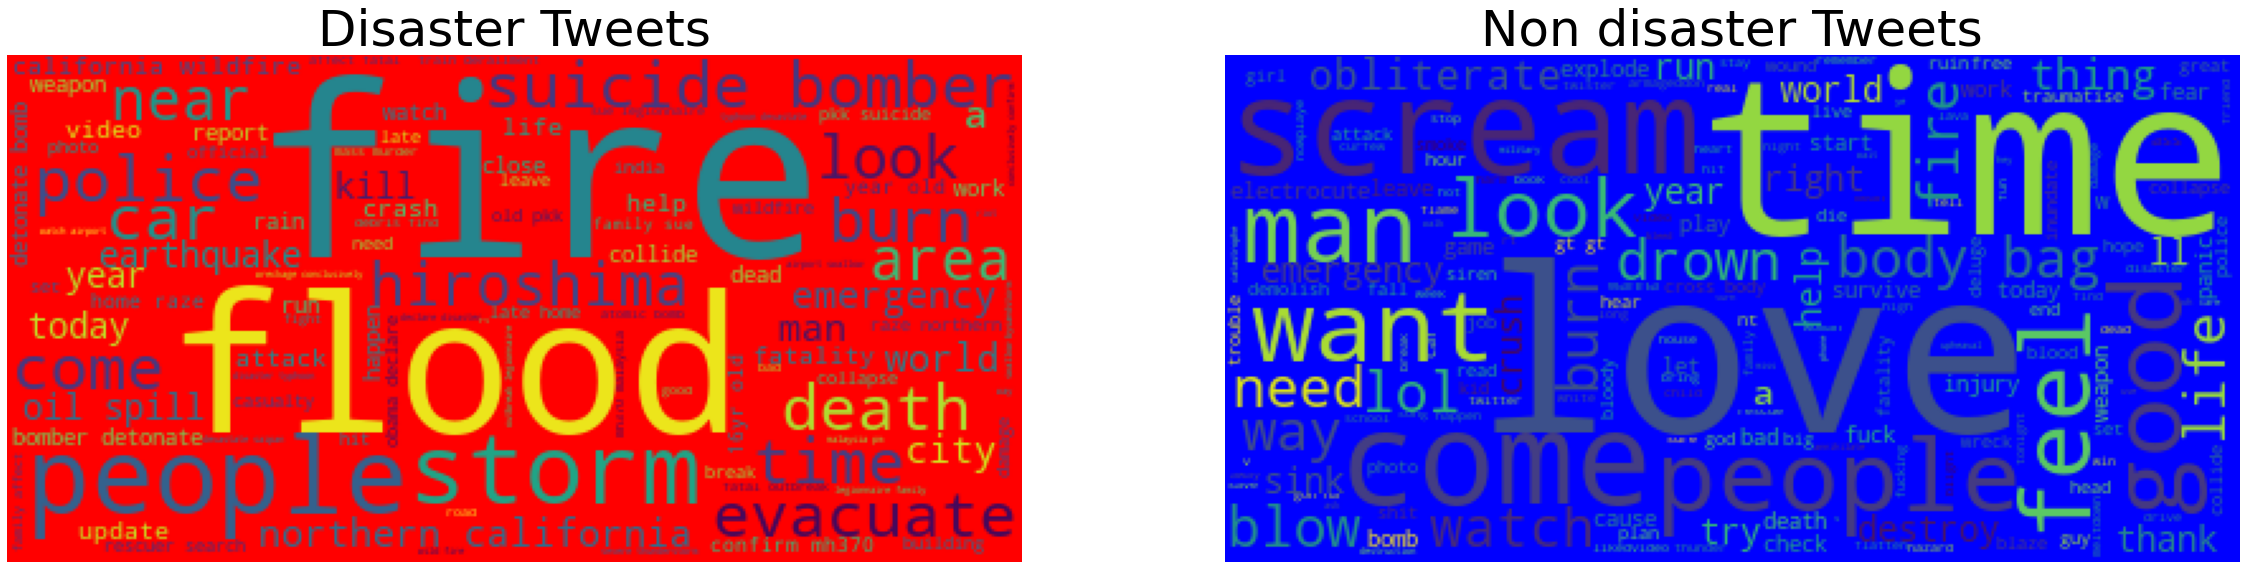

In [23]:
#Select keywords between disaster & non-disaster tweets
import wordcloud
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(40, 40))

wd = wordcloud.WordCloud(background_color='red',
                         stopwords=STOP_WORDS)
cloud_desastre = wd.generate(' '.join(' '.join(text) for text in data[data.target==1]['text_clean']))

wn = wordcloud.WordCloud(background_color='blue',
                         stopwords=STOP_WORDS)
cloud_non_desastre = wn.generate(' '.join(' '.join(text) for text in data[data.target==0]['text_clean']))

ax1.imshow(cloud_desastre)
ax1.set_title("Disaster Tweets", fontsize=50)
ax1.axis('off')

ax2.imshow(cloud_non_desastre)
ax2.set_title("Non disaster Tweets", fontsize=50)
ax2.axis('off')

fig.show()

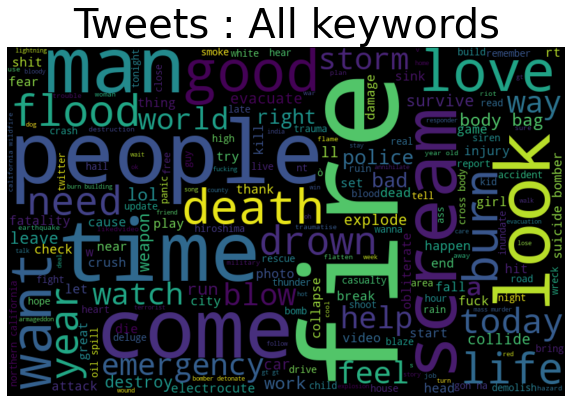

In [24]:
#General cloud of words

mask = np.array(Image.open("Couple_wc.webp"))
words = ' '.join(' '.join(text) for text in data['text_clean'])                              
wcd = WordCloud(width=800, height=500, stopwords=STOP_WORDS).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wcd, interpolation='bilinear')
plt.title("Tweets : All keywords", fontsize=40)
plt.axis('off')
fig.show()

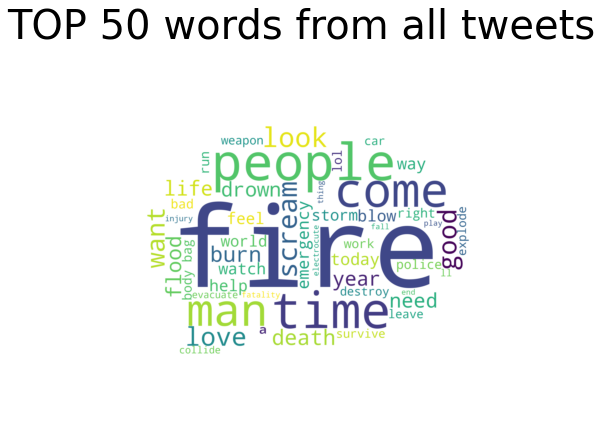

In [25]:
#Top 50 words by relevance

mask = np.array(Image.open("comment_wc.png"))
words = ' '.join(' '.join(text) for text in data['text_clean'])                               
wcd = WordCloud(background_color="white",width=800, height=500, stopwords=STOP_WORDS, mask=mask, max_font_size=600, max_words=50).generate(words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wcd, interpolation="bilinear")
plt.title("TOP 50 words from all tweets", fontsize=40)
plt.axis('off')
fig.show()


### **4. Machine Learning : Deep learning**
---

In [26]:
 # Look at a batch
for text, target in train_data.take(1):
  print(text, target)

tf.Tensor(
[[ 2378  1049  2379 ...     0     0     0]
 [  200  3728    72 ...     0     0     0]
 [   45   730    89 ...     0     0     0]
 ...
 [  820  4956   181 ...     0     0     0]
 [11582   226    55 ...     0     0     0]
 [ 9030  9031    73 ...     0     0     0]], shape=(64, 24), dtype=int32) tf.Tensor(
[0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1], shape=(64,), dtype=int64)


## A) MODELING

In [27]:
vocab_size = len(tokenizer.word_index)
model = tf.keras.Sequential([
                  # Embedding layer (input word)          
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[data.shape[1],]),   
    
                  tf.keras.layers.Conv1D(140, 3, activation='relu', strides=1),
    
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Classic layer Dense
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),

                  # Final layer with related neurones (softmax)
                    tf.keras.layers.Dense(3, activation="softmax")
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 64)             931520    
_________________________________________________________________
conv1d (Conv1D)              (None, 3, 140)            27020     
_________________________________________________________________
global_average_pooling1d (Gl (None, 140)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                9024      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 969,743
Trainable params: 969,743
Non-trainable params: 0
__________________________________________________

## B) ADAM OPTIMIZER

In [29]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [30]:
weights = dict(1/(data.target-0).value_counts()/sum(1/(data.target-1).value_counts())*5)
weights

{0: 2.1487711920094625, 1: 2.8512288079905375}

In [31]:
# Training model
history = model.fit(train_data, 
                        epochs=20, 
                            validation_data=test_data,
                                class_weight=weights,
                                       #batch_size=64
                   )

Epoch 1/20
96/96 [==============================] - 2s 13ms/step - loss: 1.8226 - sparse_categorical_accuracy: 0.5987 - val_loss: 0.5774 - val_sparse_categorical_accuracy: 0.7700
Epoch 2/20
96/96 [==============================] - 1s 11ms/step - loss: 1.0346 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.4603 - val_sparse_categorical_accuracy: 0.7924
Epoch 3/20
96/96 [==============================] - 1s 12ms/step - loss: 0.6114 - sparse_categorical_accuracy: 0.9080 - val_loss: 0.5068 - val_sparse_categorical_accuracy: 0.7786
Epoch 4/20
96/96 [==============================] - 1s 12ms/step - loss: 0.3918 - sparse_categorical_accuracy: 0.9451 - val_loss: 0.5775 - val_sparse_categorical_accuracy: 0.7746
Epoch 5/20
96/96 [==============================] - 1s 12ms/step - loss: 0.2696 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.7002 - val_sparse_categorical_accuracy: 0.7582
Epoch 6/20
96/96 [==============================] - 1s 12ms/step - loss: 0.2163 - sparse_categorical_accu

## C) EVALUATION

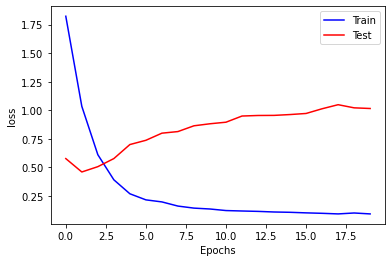

In [32]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b",label = "Train")
plt.plot(history.history["val_loss"], color="r",label = "Test")
plt.legend()
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

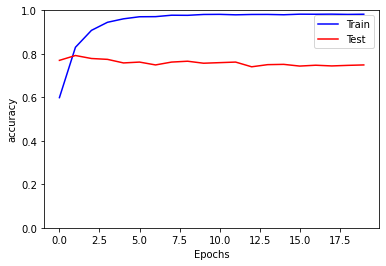

In [33]:
# Visualization of accuracy training 
plt.plot(history.history["sparse_categorical_accuracy"], color="b",label = "Train")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r",label = "Test")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.ylim([0, 1])

plt.show()


### **5. Conclusion**
---

- The dataset used has the majority of the events situated in USA, UK and INDIA
- We have shown the keywords therefore the sentiment analysis for Tweets labeled as disaster
- The model is giving us an accuracy around 75%